<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/gaussian_mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mat4py

In [ ]:
import numpy as np
import pandas as pd

from mat4py import loadmat
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# **Data**
---

Cardiotocogrpahy dataset link:
Número de observaciones: 1831
Número de variables: 21
Número de outliers: 176 (9.6%)
y: 1 = outliers, 0 = inliers
Observaciones: todas las variables están centradas y escaladas (media 0, sd 1).
Referencia: C. C. Aggarwal and S. Sathe, “Theoretical foundations and algorithms for outlier ensembles.” ACM SIGKDD Explorations Newsletter, vol. 17, no. 1, pp. 24–47, 2015. Saket Sathe and Charu C. Aggarwal. LODES: Local Density meets Spectral Outlier Detection. SIAM Conference on Data Mining, 2016.


In [ ]:
data = loadmat(filename='./data/cardio.mat')
data_X = pd.DataFrame(data['X'])
data_X.columns = ["col_" + str(i) for i in data_X.columns]
data_y = pd.DataFrame(data['y'])
data_y = data_y.to_numpy().flatten()

In [ ]:
data_X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,1.459497,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294
1829,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,-0.420487,...,1.459497,-0.976561,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294


In [ ]:
data_y

array([0., 0., 0., ..., 1., 1., 1.])

# **Model**
---

In [ ]:
model_gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    random_state = 12354
)

model_gmm.fit(X=data_X)

GaussianMixture(n_components=4, random_state=12354)

In [ ]:
model_gmm.weights_

array([0.43652598, 0.37655577, 0.08027085, 0.1066474 ])

In [ ]:
model_gmm.means_

array([[ 0.17865818, -0.14313945, -0.16505801, -0.28136676, -0.68359847,
        -0.06140064, -0.27829495,  0.17042142, -0.64443963,  0.38431669,
         0.12601234, -0.71695951,  0.69915121, -0.41033865, -0.56856772,
        -0.29413321,  0.17512791,  0.35194811,  0.22619092, -0.57617604,
        -0.1198669 ],
       [-0.16249574,  0.40234447, -0.0464222 ,  0.17691601,  0.49204826,
        -0.06140064, -0.27829495, -0.21404874,  0.55032732, -0.42012626,
         0.01474907,  0.5935908 , -0.50976294,  0.44635362,  0.45910697,
         0.22248268,  0.0975469 , -0.01480129,  0.05736311,  0.28277696,
         0.16616989],
       [-0.34036789, -0.42289767,  1.35883982,  0.29337838,  0.96729642,
         0.70351769,  2.66454884,  0.22028008,  0.9883788 , -0.42048735,
        -0.75002347,  0.97926999, -1.02224357,  0.4566018 ,  0.72975888,
         0.0638333 , -1.5310741 , -1.74421452, -1.47824721,  1.83132561,
        -0.70014962],
       [ 0.09865586, -0.51641849, -0.18324471,  0.30619991

In [ ]:
model_gmm.covariances_

array([[[ 1.18577537e+00,  2.26968446e-02, -1.89322907e-03, ...,
          8.44581585e-01, -4.13579306e-03,  1.67870885e-01],
        [ 2.26968446e-02,  8.89380152e-01, -2.80903672e-03, ...,
          1.67082824e-01,  5.78488772e-02, -7.03760127e-02],
        [-1.89322907e-03, -2.80903672e-03,  9.72995443e-03, ...,
         -3.29162708e-03,  9.94609811e-04,  1.15215284e-02],
        ...,
        [ 8.44581585e-01,  1.67082824e-01, -3.29162708e-03, ...,
          6.65804965e-01,  8.01004987e-03,  1.51399755e-01],
        [-4.13579306e-03,  5.78488772e-02,  9.94609811e-04, ...,
          8.01004987e-03,  1.03823674e-02,  1.05608475e-02],
        [ 1.67870885e-01, -7.03760127e-02,  1.15215284e-02, ...,
          1.51399755e-01,  1.05608475e-02,  8.96784368e-01]],

       [[ 8.06653709e-01,  1.39792969e-01, -1.38525223e-03, ...,
          6.37143316e-01,  1.17449478e-02,  3.98037913e-01],
        [ 1.39792969e-01,  1.14811195e+00,  8.72600710e-02, ...,
          6.11742309e-01,  1.06311389e

In [ ]:
model_gmm.covariance_type

'full'

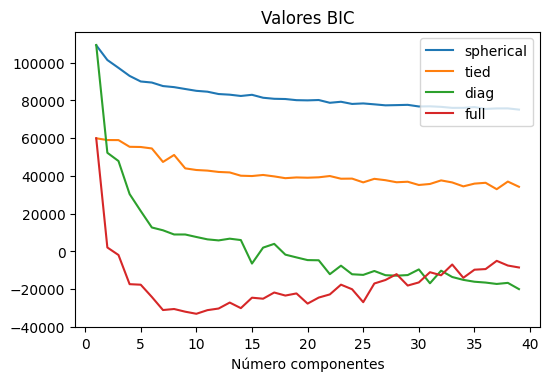

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 40)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
  valores_bic = []

  for i in n_components:
    model = GaussianMixture(n_components=i, covariance_type=covariance_type)
    model = model.fit(data_X)
    valores_bic.append(model.bic(data_X))

  ax.plot(n_components, valores_bic, label=covariance_type)

ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

- La configuracion optima seia de seis componentes y con el tipo de covarianza **full**

In [ ]:
modelo_gmm = GaussianMixture(
    n_components = 6,
    covariance_type = 'full',
    random_state=12354
)

modelo_gmm.fit(X=data_X)

GaussianMixture(n_components=6, random_state=12354)

# **Prediccion**

In [ ]:
log_probabilidad_predicha = modelo_gmm.score_samples(X=data_X)
log_probabilidad_predicha

array([ 11.06621958,   9.27671138,   9.50917351, ...,  -0.78883681,
        -0.49892724, -16.38266298])

<Axes: ylabel='Density'>

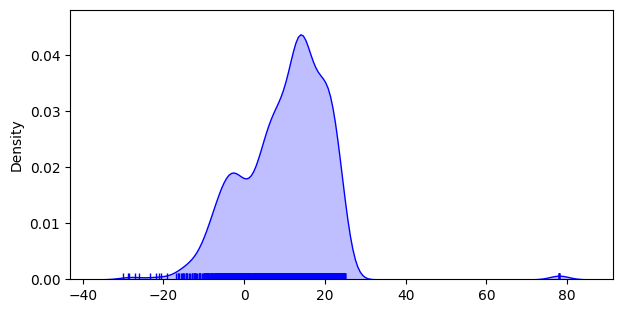

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    log_probabilidad_predicha,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

In [ ]:
ax.set_title('Distribución predicciones')
ax.set_xlabel('Logaritmo densidad de probabilidad');

In [ ]:
df_resultados = pd.DataFrame({
                    'log_probabilidad' : log_probabilidad_predicha,
                    'anomalia' : data_y
                })

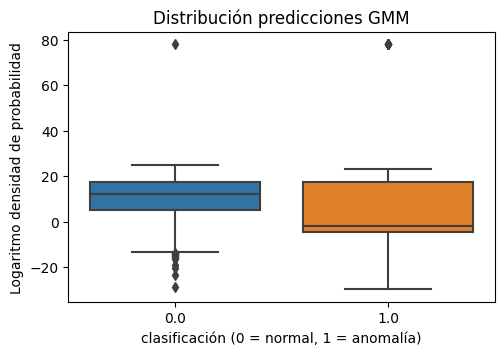

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 3.5))
sns.boxplot(
    x     = 'anomalia',
    y     = 'log_probabilidad',
    data  = df_resultados,
    #color = "white",
    palette = 'tab10',
    ax    = ax
)

ax.set_title('Distribución predicciones GMM')
ax.set_ylabel('Logaritmo densidad de probabilidad')
ax.set_xlabel('clasificación (0 = normal, 1 = anomalía)');

El modelo anterior se ha entrenado empleando todas las observaciones, incluyendo potenciales anomalías. Dado que el objetivo es aprender las distribuciones de las componentes únicamente con los datos “normales”, se puede mejorar el resultado reentrenando el modelo pero excluyendo las n observaciones con menor probabilidad (potenciales anomalías).

Se repite la detección de anomalías pero, esta vez, descartando las observaciones con una densidad de probabilidad inferior al cuantil 0.01.

In [ ]:
df_resultados = df_resultados \
                .sort_values('log_probabilidad', ascending=True) \
                .reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 176, 1, 0)

pd.crosstab(
    df_resultados.anomalia,
    df_resultados.clasificacion
)

clasificacion,0,1
anomalia,,
0.0,1521,134
1.0,133,43


# **Reentrenamiento**
---

In [ ]:
cuantil = np.quantile(a = log_probabilidad_predicha, q = 0.01)
print('Cuantil: ', cuantil)

Cuantil:  -14.722121733596804


In [ ]:
data_X_trimmed = data_X.loc[log_probabilidad_predicha > cuantil, :].copy()
data_X_trimmed

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,-0.418356,-0.919988,-0.180574,1.042659,1.094482,-0.061401,3.349430,1.281003,1.685570,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,0.963083,-1.982928,-3.126987,-1.837520,-0.022583,-2.126605
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,1.459497,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294


In [ ]:
data_y_trimmed = data_y[log_probabilidad_predicha > cuantil].copy()
data_y_trimmed

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
model_gmm = GaussianMixture(
    n_components = 6,
    covariance_type = 'full',
    random_state = 12354
)

modelo_gmm.fit(X=data_X_trimmed)

GaussianMixture(n_components=6, random_state=12354)

In [ ]:
df_resultados = pd.DataFrame({
                    'log_probabilidad': modelo_gmm.score_samples(X=data_X),
                    'anomalia' : data_y
                })

df_resultados = df_resultados \
                .sort_values('log_probabilidad', ascending=True) \
                .reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 176, 1, 0)

pd.crosstab(
    df_resultados.anomalia,
    df_resultados.clasificacion
)

clasificacion,0,1
anomalia,,
0.0,1553,102
1.0,101,75
